# **Banking Chat Intent Clustering Project**

In [4]:
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `noname` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-creden

In [5]:
pip install datasets huggingface_hub

In [3]:
from datasets import load_dataset

# Replace with your username/dataset name
dataset = load_dataset("atulgupta002/banking_customer_service_query_intent")

# See available splits
print(dataset)

# Convert to DataFrame
df = dataset['train'].to_pandas()
df=df[["query","intent"]]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'query', 'intent'],
        num_rows: 5000
    })
})
   Unnamed: 0                                              query  \
0           0  Could you please help me reset my account pass...   
1           1              What company charged my account last?   
2           2  How do I schedule an appointment to discuss lo...   
3           3                        Which loans 2day suited me?   
4           4  Do you have any updated timelines for my loan ...   

              intent  
0     password_reset  
1  transaction_query  
2       loan_inquiry  
3       loan_inquiry  
4       loan_inquiry  


In [4]:
df=df[["query","intent"]]

In [5]:
df.sample(4)

,query,intent
1058,I would appreciate assistance in understanding...,credi_card_application
2103,Could you assist in determining if my account ...,loan_inquiry
1323,pls reset pass b4 i lose my mind,password_reset
679,how do i apply 4 biz credit?,loan_inquiry


In [4]:
df["intent"].value_counts()

,count
intent,
loan_inquiry,1600
fraud_report,1249
transaction_query,1210
balance_inquiry,323
credi_card_application,318
password_reset,300


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
df.shape

(5000, 2)

In [8]:
df.isnull().sum()

,0
query,0
intent,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   query   5000 non-null   object
 1   intent  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [10]:
df.duplicated().sum()

np.int64(26)

In [11]:
df.drop_duplicates(inplace = True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

# **Text Preprocessing**

In [13]:
df.sample(5)

,query,intent
1858,Was the most recent transaction completed with...,transaction_query
4035,ayo yall hacked me,fraud_report
4736,"my pass expired, how do i reset?",password_reset
1743,What is the present financial status of my sav...,balance_inquiry
1882,May I ask for a thorough explanation of your l...,loan_inquiry


In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [15]:
list(stop_words)[:10]

['and',
 "she's",
 'is',
 "it's",
 "shouldn't",
 't',
 'if',
 "they'd",
 'had',
 "aren't"]

In [16]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)  # keeps only letters and spaces

    # 3. Tokenize
    words = nltk.word_tokenize(text)

    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 5. Remove special characters
    words = [word for word in words if word.isalnum()==1]

    # 6. Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]

    # 7. Re-join words into a string
    return ' '.join(words)

In [19]:
for i in range(len(df)):
    df["query"][i]=preprocess_text(df["query"][i])

In [22]:
preprocess_text("ayo yall hacked me")

'ayo yall hacked'

In [24]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [25]:
AI_wc=wc.generate(df["query"].str.cat(sep=" "))

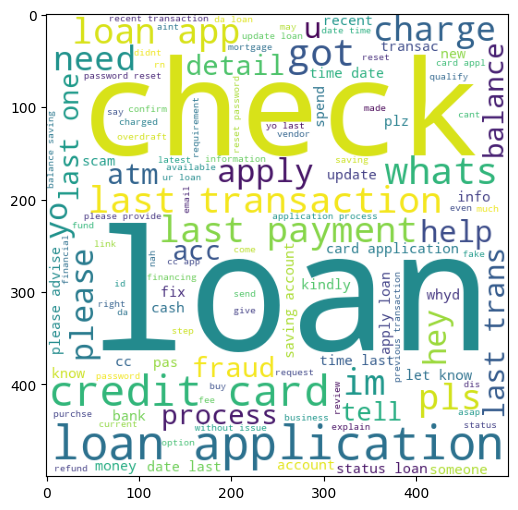

In [26]:
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

# **Feature Engineering**

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=300, ngram_range=(1,3))

In [52]:
X=tfidf.fit_transform(df["query"]).toarray()

In [53]:
X.shape

(4974, 300)

In [61]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['query'].tolist())

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)  # or 'embeddings' for SBERT

In [73]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
df['cluster'] = clusterer.fit_predict(embeddings)

In [78]:
from sklearn.metrics import silhouette_score

# For vectorized data
score = silhouette_score(embeddings, df['cluster'])  # or 'embeddings'

print(f"Silhouette Score: {score:.2f}")  # Aim for >0.5

Silhouette Score: 0.09


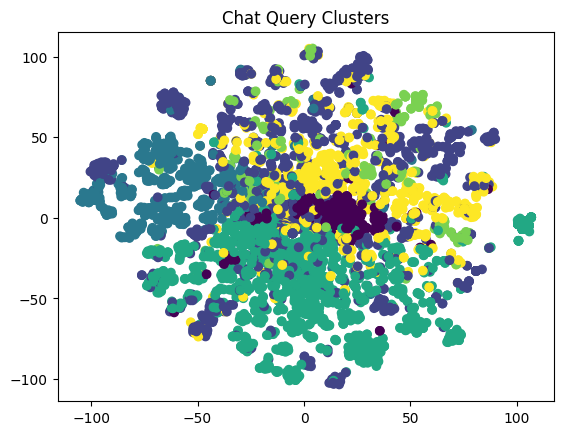

In [69]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
vis_data = tsne.fit_transform(X)

plt.scatter(vis_data[:, 0], vis_data[:, 1], c=df['cluster'], cmap='viridis')
plt.title("Chat Query Clusters")
plt.show()

In [83]:
#pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible

In [1]:
from nltk.tokenize import word_tokenize

In [6]:
df

,query,intent
0,Could you please help me reset my account pass...,password_reset
1,What company charged my account last?,transaction_query
2,How do I schedule an appointment to discuss lo...,loan_inquiry
3,Which loans 2day suited me?,loan_inquiry
4,Do you have any updated timelines for my loan ...,loan_inquiry
...,...,...
4995,Was the transaction processed correctly?,transaction_query
4996,Apple Pay charges I didn’t make—fraud!!,fraud_report
4997,Can you provide detailed steps on how to begin...,loan_inquiry
4998,what’s the acc say? nervous chuckle,balance_inquiry


In [7]:
# Sample: Use your own dataframe
texts = df['query'].astype(str).apply(word_tokenize)

In [8]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=texts,
                     vector_size=300,   # dimension of word embeddings
                     window=5,       # context window size
                     min_count=1,    # ignore rare words
                     sg=1)  # 1 = Skip-gram


In [9]:
w2v_model.wv['check']

array([ 0.03630541,  0.10556128, -0.08435785,  0.06095911,  0.12681112,
       -0.13368194,  0.09236835,  0.27283028,  0.07820866,  0.03014802,
       -0.0175168 , -0.13120188, -0.09091245, -0.00335718, -0.02737842,
       -0.05831458,  0.12552859,  0.04819201,  0.10499315, -0.04519648,
       -0.04453789, -0.04413409,  0.18559174,  0.00894822, -0.06314208,
        0.06067482, -0.1352418 , -0.09997616, -0.14746116, -0.06069662,
        0.12359828, -0.06053425,  0.03908334,  0.04258515, -0.09026598,
        0.12591277, -0.02877494, -0.0278694 , -0.06337349, -0.0172609 ,
       -0.11444492,  0.05766811,  0.1260676 , -0.05855938,  0.07825004,
        0.09201267,  0.04196916,  0.00710163, -0.12322395,  0.0706398 ,
        0.07292578,  0.08281413, -0.14102271,  0.09434362, -0.00499564,
        0.18015322,  0.06761307,  0.02011781,  0.07370505, -0.03664183,
       -0.16926664,  0.02060376, -0.07399998,  0.02030248, -0.09433614,
        0.09839907, -0.00811235,  0.09650765, -0.16685827, -0.08

In [11]:
w2v_model.wv.most_similar('loan')

[('line', 0.9629036784172058),
 ('approval', 0.962518036365509),
 ('submit', 0.9612851142883301),
 ('credit', 0.9605515003204346),
 ('steps', 0.9584606289863586),
 ('on', 0.9576819539070129),
 ('personal', 0.9573211669921875),
 ('required', 0.9554418921470642),
 ('application', 0.954888641834259),
 ('regarding', 0.9509759545326233)]

In [14]:
import numpy as np
vocab_set = set(w2v_model.wv.index_to_key)
vector_size = w2v_model.vector_size
X_w2v = np.zeros((len(df), vector_size))
for i, text in enumerate(df['query']):
    vectors = [w2v_model.wv[word] for word in text if word in vocab_set]
    if vectors:
        X_w2v[i] = np.mean(vectors, axis=0)


In [16]:
X_w2v

array([[-0.0146107 ,  0.10901842, -0.04898347, ..., -0.05695681,
         0.1084467 , -0.06725479],
       [-0.01396885,  0.11685753, -0.0434003 , ..., -0.07728344,
         0.12547073, -0.05353657],
       [-0.015592  ,  0.1243165 , -0.05252567, ..., -0.06686812,
         0.11984246, -0.07384428],
       ...,
       [-0.0171927 ,  0.13332888, -0.03586521, ..., -0.08481096,
         0.12746266, -0.06543156],
       [-0.01875741,  0.11218677, -0.04241446, ..., -0.0511254 ,
         0.11027022, -0.06501191],
       [-0.01163105,  0.12245308, -0.06470449, ..., -0.06999706,
         0.12881836, -0.068672  ]])

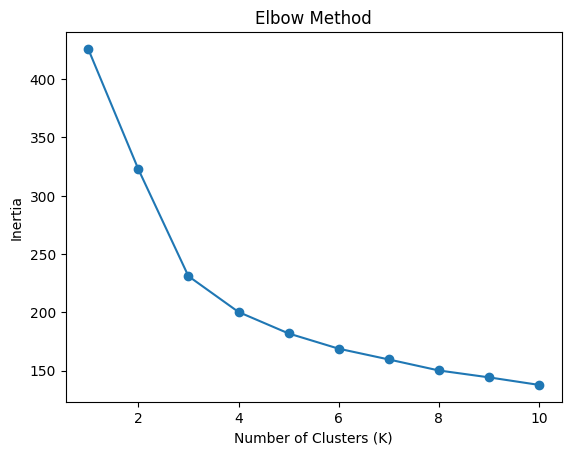

In [29]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_w2v)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_w2v)
    score = silhouette_score(X_w2v, clusters)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.2f}")

K=2, Silhouette Score=0.24
K=3, Silhouette Score=0.26
K=4, Silhouette Score=0.21
K=5, Silhouette Score=0.19
K=6, Silhouette Score=0.17
K=7, Silhouette Score=0.17
K=8, Silhouette Score=0.17
K=9, Silhouette Score=0.15
K=10, Silhouette Score=0.15


In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering

In [20]:
# ==== 4. Agglomerative Clustering ====
n_clusters = 4  # you can change this
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clust.fit_predict(X_w2v)

df['Agg_cluster'] = cluster_labels
from sklearn.metrics import silhouette_score
# ==== 5. Evaluation ====
sil_score = silhouette_score(X_w2v, cluster_labels)


print(f"Silhouette Score: {sil_score:.3f}")



Silhouette Score: 0.204


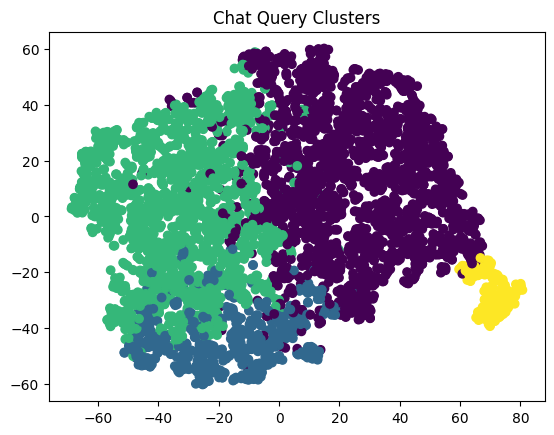

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
vis_data = tsne.fit_transform(X_w2v)

plt.scatter(vis_data[:, 0], vis_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Chat Query Clusters")
plt.show()

In [23]:
# kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_w2v)

sil_score = silhouette_score(X_w2v, df['kmeans_cluster'])


print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.215


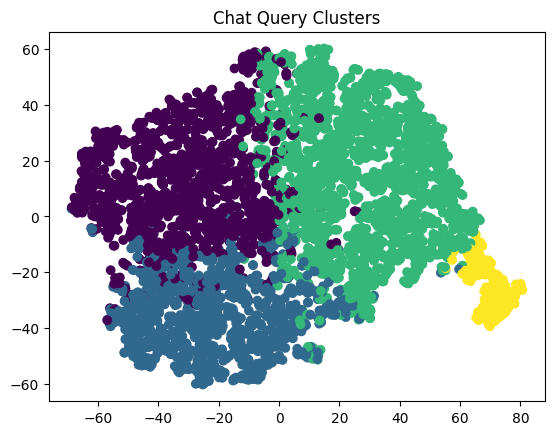

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
vis_data = tsne.fit_transform(X_w2v)

plt.scatter(vis_data[:, 0], vis_data[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.title("Chat Query Clusters")
plt.show()

In [28]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5) # Adjusted parameters
df['dbscan_cluster'] = dbscan.fit_predict(X_w2v)

# Check the number of unique clusters found by DBSCAN
num_clusters = len(np.unique(df['dbscan_cluster']))

if num_clusters > 1:
  sil_score = silhouette_score(X_w2v, df['dbscan_cluster'])
  print(f"Silhouette Score: {sil_score:.3f}")
else:
  print("DBSCAN found only one cluster. Try adjusting eps and min_samples.")

Silhouette Score: -0.043


In [34]:
df

,query,intent,Agg_cluster,kmeans_cluster,dbscan_cluster
0,Could you please help me reset my account pass...,password_reset,1,1,0
1,What company charged my account last?,transaction_query,2,1,0
2,How do I schedule an appointment to discuss lo...,loan_inquiry,0,0,0
3,Which loans 2day suited me?,loan_inquiry,2,0,0
4,Do you have any updated timelines for my loan ...,loan_inquiry,2,0,0
...,...,...,...,...,...
4995,Was the transaction processed correctly?,transaction_query,0,2,0
4996,Apple Pay charges I didn’t make—fraud!!,fraud_report,0,2,0
4997,Can you provide detailed steps on how to begin...,loan_inquiry,2,0,0
4998,what’s the acc say? nervous chuckle,balance_inquiry,0,1,-1


In [36]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to clean text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

# Apply cleaning
df["clean_query"] = df["query"].apply(clean_text)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_tfidf = vectorizer.fit_transform(df["clean_query"])

print("Shape of TF-IDF matrix:", X_tfidf.shape)


Shape of TF-IDF matrix: (5000, 1000)


In [37]:
from sklearn.decomposition import PCA

# Reduce dimensions for clustering
pca = PCA(n_components=50, random_state=42)  # keep top 50 components
X_pca = pca.fit_transform(X_tfidf.toarray())

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (5000, 50)


In [38]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Load pre-trained SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode sentences
X_embeddings = model.encode(df["clean_query"], show_progress_bar=True)

print("Shape of SBERT embeddings:", X_embeddings.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 966.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Shape of SBERT embeddings: (5000, 384)


In [64]:
from sklearn.cluster import KMeans
import numpy as np

# Choose embeddings (pick X_pca or X_embeddings)
#X = X_embeddings  # if using SBERT
X = X_pca       # if using TF-IDF + PCA

# Define KMeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Add cluster labels to dataframe
df["cluster"] = clusters

# Check some results
df[["query", "intent", "cluster"]].sample(20)


,query,intent,cluster
2335,Something looks off with my last few transacti...,fraud_report,1
3594,i never used atm that night,fraud_report,1
62,What vendor processed my most recent charge?,transaction_query,1
67,too many charges poppin up,fraud_report,1
2364,I have forgotten my password; please help me r...,password_reset,1
3467,Did the app break? WHY CAN’T I SEE MY SAVINGS?!,balance_inquiry,5
1386,Was the last payment made correctly?,transaction_query,1
3564,business lending types?,loan_inquiry,1
1845,whut loan solutions do u have?,loan_inquiry,2
3141,Was the previous transaction done without issues?,transaction_query,5


In [47]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# True labels (ground truth)
y_true = df["intent"]

# Predicted cluster labels
y_pred = df["cluster"]

# Adjusted Rand Index (ARI): how well clustering matches true labels (0 = random, 1 = perfect)
ari = adjusted_rand_score(y_true, y_pred)

# Normalized Mutual Information (NMI): measures shared information (0 to 1)
nmi = normalized_mutual_info_score(y_true, y_pred)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
sil_score = silhouette_score(X, df['cluster'])


print(f"Silhouette Score: {sil_score:.3f}")

Adjusted Rand Index (ARI): 0.2206192099643765
Normalized Mutual Information (NMI): 0.3840869184207783
Silhouette Score: 0.103


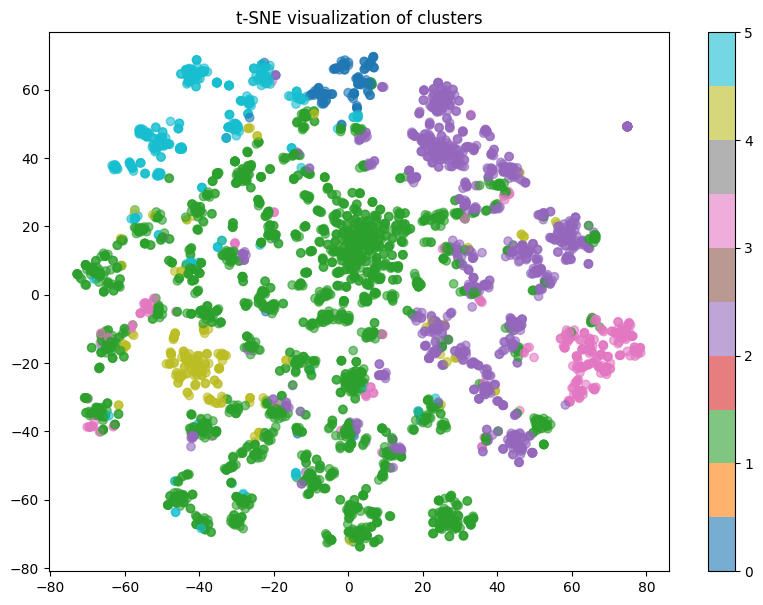

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce embeddings to 2D for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10,7))
plt.scatter(X_2d[:,0], X_2d[:,1], c=df["cluster"], cmap="tab10", alpha=0.6)
plt.colorbar()
plt.title("t-SNE visualization of clusters")
plt.show()


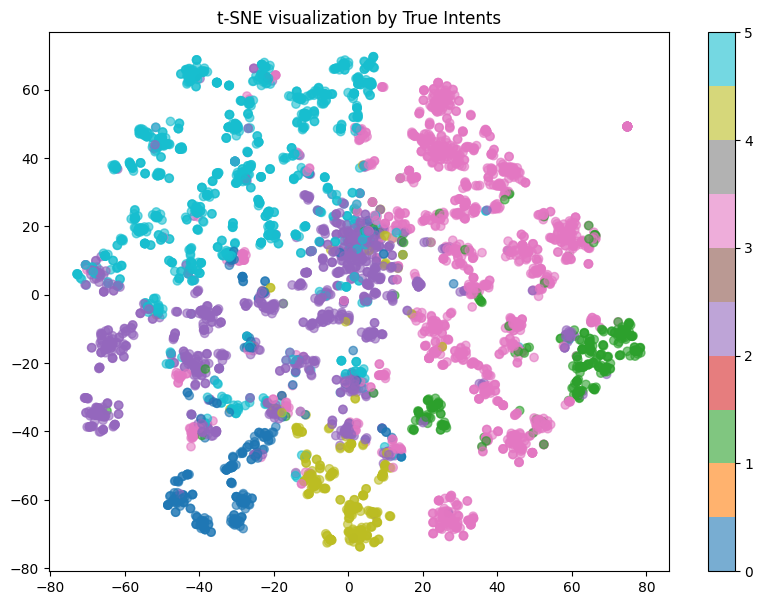

In [49]:
plt.figure(figsize=(10,7))
plt.scatter(X_2d[:,0], X_2d[:,1], c=df["intent"].astype('category').cat.codes, cmap="tab10", alpha=0.6)
plt.colorbar()
plt.title("t-SNE visualization by True Intents")
plt.show()


In [51]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load a pre-trained sentence embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode all queries
embeddings = model.encode(df["query"].tolist(), show_progress_bar=True)

# Cluster
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings)


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [52]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN(min_cluster_size=10, metric='euclidean')
df["cluster"] = clusterer.fit_predict(embeddings)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [53]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(df["intent"], df["cluster"])
nmi = normalized_mutual_info_score(df["intent"], df["cluster"])
print("ARI:", ari)
print("NMI:", nmi)


ARI: 0.21203621492640584
NMI: 0.4686243542822578


# **UMAP & T-SNE**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
from datasets import load_dataset

# Replace with your username/dataset name
dataset = load_dataset("atulgupta002/banking_customer_service_query_intent")

# See available splits
print(dataset)

# Convert to DataFrame
df = dataset['train'].to_pandas()
df=df[["query","intent"]]

README.md:   0%|          | 0.00/312 [00:00<?, ?B/s]

(…)ervice_intent_classification_dataset.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'query', 'intent'],
        num_rows: 5000
    })
})


In [4]:
df

,query,intent
0,Could you please help me reset my account pass...,password_reset
1,What company charged my account last?,transaction_query
2,How do I schedule an appointment to discuss lo...,loan_inquiry
3,Which loans 2day suited me?,loan_inquiry
4,Do you have any updated timelines for my loan ...,loan_inquiry
...,...,...
4995,Was the transaction processed correctly?,transaction_query
4996,Apple Pay charges I didn’t make—fraud!!,fraud_report
4997,Can you provide detailed steps on how to begin...,loan_inquiry
4998,what’s the acc say? nervous chuckle,balance_inquiry


In [5]:
df.columns=["t","i"]

In [6]:
df["n_c"]=df["t"].apply(len)

In [7]:
df["n_w"]=df["t"].apply(lambda  x:len(nltk.word_tokenize(x)))

In [8]:
df["n_s"]=df["t"].apply(lambda  x:len(nltk.sent_tokenize(x)))

In [9]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

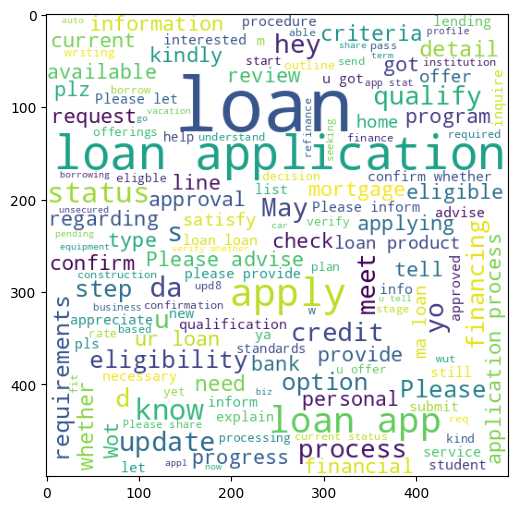

In [10]:
AI_wc=wc.generate(df[df["i"]=="loan_inquiry"]["t"].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [11]:
df[df["i"]=="loan_inquiry"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,1600.000000,1600.000000,1600.000000
mean,47.361250,10.124375,1.011875
std,21.274983,3.323524,0.108357
min,12.000000,3.000000,1.000000
25%,28.000000,7.000000,1.000000
50%,44.000000,10.000000,1.000000
75%,64.250000,13.000000,1.000000
max,112.000000,20.000000,2.000000


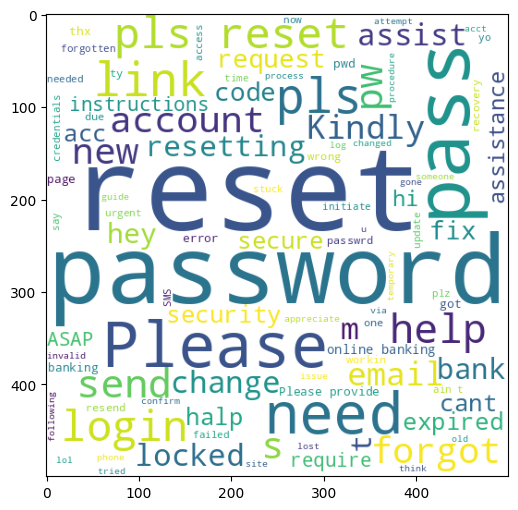

In [12]:
AI_wc=wc.generate(df[df["i"]=="password_reset"]["t"].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [13]:
df[df["i"]=="password_reset"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,300.000000,300.000000,300.000000
mean,40.050000,8.613333,1.233333
std,11.561418,2.258501,0.461446
min,20.000000,4.000000,1.000000
25%,31.000000,7.000000,1.000000
50%,37.000000,9.000000,1.000000
75%,49.000000,10.000000,1.000000
max,76.000000,14.000000,3.000000


In [13]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth (prevents TensorFlow from grabbing all GPU memory at once)
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"TensorFlow is using GPU: {gpus}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. TensorFlow is running on CPU.")


TensorFlow is using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


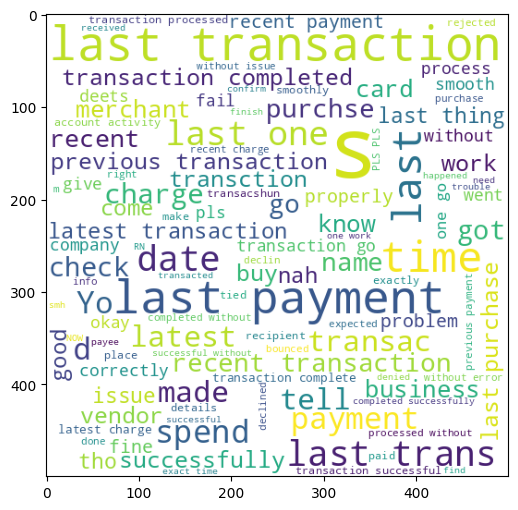

In [14]:
AI_wc=wc.generate(df[df["i"]=="transaction_query"]["t"].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [15]:
df[df["i"]=="transaction_query"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,1210.000000,1210.000000,1210.000000
mean,40.805785,8.990083,1.090083
std,10.304919,2.380629,0.286419
min,16.000000,3.000000,1.000000
25%,32.000000,7.000000,1.000000
50%,40.000000,9.000000,1.000000
75%,49.000000,10.000000,1.000000
max,68.000000,17.000000,2.000000


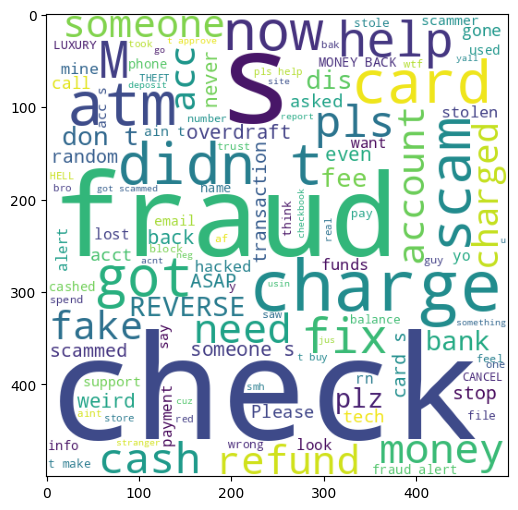

In [16]:
# fraud_report
AI_wc=wc.generate(df[df["i"]=="fraud_report"]["t"].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [17]:
df[df["i"]=="fraud_report"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,1249.000000,1249.000000,1249.000000
mean,37.662930,9.349880,1.495596
std,14.487204,4.348418,0.673577
min,9.000000,2.000000,1.000000
25%,25.000000,6.000000,1.000000
50%,38.000000,9.000000,1.000000
75%,46.000000,12.000000,2.000000
max,91.000000,25.000000,4.000000


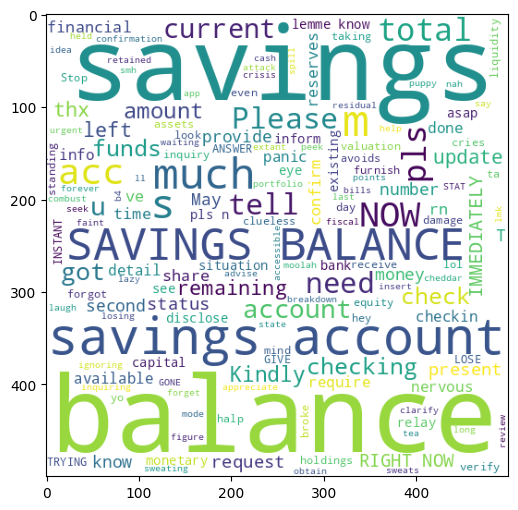

In [18]:
AI_wc=wc.generate(df[df["i"]=="balance_inquiry"]["t"].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [19]:
df[df["i"]=="balance_inquiry"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,323.000000,323.000000,323.000000
mean,43.894737,9.674923,1.448916
std,8.727486,2.121223,0.695833
min,7.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,46.000000,10.000000,1.000000
75%,50.000000,11.000000,2.000000
max,74.000000,16.000000,7.000000


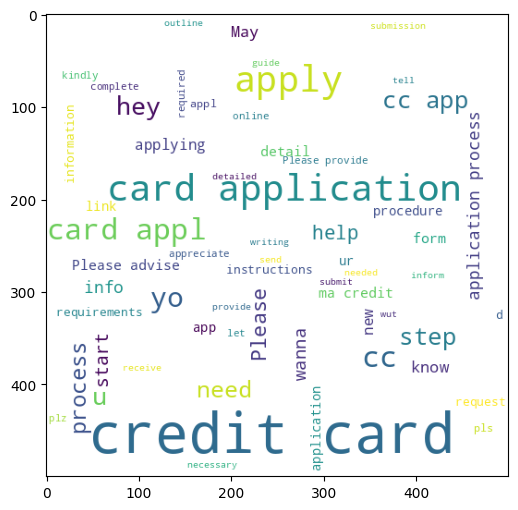

In [20]:
AI_wc=wc.generate(df[df["i"]=="credi_card_application"]["t"].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [21]:
df[df["i"]=="credi_card_application"][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,318.000000,318.000000,318.000000
mean,52.924528,11.327044,1.022013
std,22.129971,3.370866,0.146956
min,11.000000,4.000000,1.000000
25%,31.000000,8.000000,1.000000
50%,51.000000,12.000000,1.000000
75%,72.000000,14.000000,1.000000
max,107.000000,19.000000,2.000000


In [22]:
df

,t,i,n_c,n_w,n_s
0,Could you please help me reset my account pass...,password_reset,51,10,1
1,What company charged my account last?,transaction_query,37,7,1
2,How do I schedule an appointment to discuss lo...,loan_inquiry,67,13,1
3,Which loans 2day suited me?,loan_inquiry,27,6,1
4,Do you have any updated timelines for my loan ...,loan_inquiry,55,11,1
...,...,...,...,...,...
4995,Was the transaction processed correctly?,transaction_query,40,6,1
4996,Apple Pay charges I didn’t make—fraud!!,fraud_report,39,10,2
4997,Can you provide detailed steps on how to begin...,loan_inquiry,66,13,1
4998,what’s the acc say? nervous chuckle,balance_inquiry,35,9,2


In [23]:
from sentence_transformers import SentenceTransformer
# Load a pre-trained sentence embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")
# Encode all queries
embeddings = model.encode(df["t"].tolist(), show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [88]:
embeddings

array([[-0.03671908, -0.07597653, -0.01249438, ...,  0.0780434 ,
        -0.02108414, -0.10642095],
       [ 0.00080891, -0.01177414, -0.02466845, ..., -0.11604776,
         0.04516524, -0.01950026],
       [ 0.0100682 , -0.00434602, -0.00085265, ...,  0.02112929,
        -0.09129895, -0.06690539],
       ...,
       [ 0.0392577 ,  0.03649173, -0.0212892 , ...,  0.08284812,
        -0.02740316, -0.06003959],
       [-0.08713641, -0.00544636,  0.02045082, ...,  0.06934794,
         0.02031212, -0.03548901],
       [ 0.01072836, -0.02365415,  0.05852266, ..., -0.01786028,
        -0.05420143,  0.01089964]], dtype=float32)

In [89]:
X_new=pd.concat([pd.DataFrame(embeddings),df[["n_w","n_s","n_c"]]], axis=1)

In [90]:
X_new

,0,1,2,3,4,5,6,7,8,9,...,377,378,379,380,381,382,383,n_w,n_s,n_c
0,-0.036719,-0.075977,-0.012494,-0.026569,-0.027302,0.059690,0.018057,0.017092,0.009097,-0.017147,...,-0.002832,-0.119624,0.027800,0.051472,0.078043,-0.021084,-0.106421,10,1,51
1,0.000809,-0.011774,-0.024668,-0.013851,0.042000,-0.004458,0.054191,-0.037227,0.062161,-0.022968,...,0.024998,-0.109863,0.027122,0.016133,-0.116048,0.045165,-0.019500,7,1,37
2,0.010068,-0.004346,-0.000853,0.005554,-0.081639,-0.049284,-0.025041,0.039795,0.041797,-0.043278,...,-0.023813,0.040649,-0.023532,-0.008748,0.021129,-0.091299,-0.066905,13,1,67
3,0.006883,-0.046947,-0.049527,-0.010081,-0.017726,-0.069042,0.014642,0.025617,-0.020526,-0.030805,...,0.073519,-0.020764,-0.029917,0.052865,-0.080847,-0.044232,-0.068631,6,1,27
4,-0.024798,-0.058147,0.058895,-0.019508,0.016510,-0.078348,-0.142908,-0.036995,-0.023168,-0.022636,...,-0.027766,0.013218,-0.081935,0.097046,-0.035238,-0.043955,-0.022246,11,1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.008571,0.079681,-0.018899,-0.001861,-0.077694,-0.096329,0.055912,-0.053277,-0.016167,0.009940,...,-0.021826,0.040367,-0.009844,-0.000804,-0.031591,-0.036646,-0.036928,6,1,40
4996,-0.064108,0.057621,0.095225,-0.035204,0.021385,-0.050942,0.103024,-0.074215,0.074222,0.040593,...,-0.053427,-0.037159,0.032021,0.147701,-0.098777,0.034525,-0.008486,10,2,39
4997,0.039258,0.036492,-0.021289,-0.051159,-0.079778,-0.003736,-0.049690,0.070004,-0.063574,-0.018668,...,0.015649,0.064559,-0.056138,0.027120,0.082848,-0.027403,-0.060040,13,1,66
4998,-0.087136,-0.005446,0.020451,0.068807,-0.009414,-0.018395,0.171198,-0.017964,-0.037767,-0.092763,...,-0.015286,-0.088070,0.001178,0.066607,0.069348,0.020312,-0.035489,9,2,35


In [91]:
X_new.columns=[f"f{i}" for i in range(len(X_new.columns))]

In [92]:
 # min max scaler
 from sklearn.preprocessing import MinMaxScaler
 scaler=MinMaxScaler()
 X=scaler.fit_transform(X_new)


In [93]:
 x_df=pd.DataFrame(X)

In [94]:
 x_df

,0,1,2,3,4,5,6,7,8,9,...,377,378,379,380,381,382,383,384,385,386
0,0.492873,0.214210,0.485070,0.365148,0.357505,0.731027,0.438363,0.542738,0.502959,0.461707,...,0.488209,0.132130,0.592539,0.567308,0.791331,0.504590,0.193071,0.375000,0.000000,0.419048
1,0.596808,0.394395,0.448255,0.409578,0.580055,0.522454,0.518197,0.368965,0.671973,0.440499,...,0.576576,0.162620,0.590350,0.469144,0.276334,0.686880,0.468907,0.250000,0.000000,0.285714
2,0.622453,0.415242,0.520274,0.477369,0.183014,0.376707,0.343146,0.615369,0.607112,0.366491,...,0.421590,0.632755,0.426784,0.400027,0.640316,0.311389,0.318470,0.500000,0.000000,0.571429
3,0.613632,0.295682,0.373082,0.422748,0.388259,0.312467,0.430820,0.570011,0.408602,0.411942,...,0.730642,0.440928,0.406166,0.571180,0.369734,0.440898,0.312996,0.208333,0.000000,0.190476
4,0.525889,0.264249,0.700952,0.389816,0.498201,0.282210,0.082741,0.369708,0.400187,0.441707,...,0.409039,0.547073,0.238195,0.693907,0.490752,0.441658,0.460193,0.416667,0.000000,0.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.570830,0.651066,0.465703,0.451462,0.195682,0.223745,0.521998,0.317616,0.422487,0.560408,...,0.427901,0.631873,0.470983,0.422097,0.500429,0.461771,0.413601,0.208333,0.000000,0.314286
4996,0.417018,0.589153,0.810812,0.334985,0.513854,0.371316,0.626084,0.250635,0.710390,0.672105,...,0.327560,0.389714,0.606168,0.834616,0.322159,0.657604,0.503860,0.375000,0.166667,0.304762
4997,0.703294,0.529854,0.458474,0.279246,0.188991,0.524803,0.288689,0.712010,0.271489,0.456166,...,0.546890,0.707440,0.321495,0.499664,0.804080,0.487203,0.340259,0.500000,0.000000,0.561905
4998,0.353239,0.412154,0.584696,0.698333,0.414951,0.477141,0.776704,0.430590,0.353689,0.186175,...,0.448667,0.230691,0.506576,0.609352,0.768258,0.618495,0.418168,0.333333,0.166667,0.266667


In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# **KMeans**

In [96]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimension reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=60,learning_rate=100) # You can adjust n_components and perplexity
X_tsne = tsne.fit_transform(X_new)

print("Shape after t-SNE:", X_tsne.shape)

Shape after t-SNE: (5000, 2)


In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=4,
    init="k-means++",
    random_state=42,
    n_init=50
)
clusters = kmeans.fit_predict(X_tsne)


# Add cluster labels to dataframe
df['Kmeans'] = clusters

# Unsupervised evaluation
silhouette = silhouette_score(X_tsne, clusters)
calinski = calinski_harabasz_score(X_tsne, clusters)
davies = davies_bouldin_score(X_tsne, clusters)

In [111]:
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.3f}")
print(f"Davies-Bouldin Score: {davies:.3f}")

# Inspect cluster examples
for i in range(4):
    print(f"\nCluster {i} examples:")
    print(df[df['Kmeans'] == i]['t'].sample(5).to_list())

Silhouette Score: 0.488
Calinski-Harabasz Score: 6494.805
Davies-Bouldin Score: 0.666

Cluster 0 examples:
['do i tick off da loan criteria?', 'last payment—did it go thru or nah', 'This was not authorized by me. Period.', 'how come my charge didn’t slide thru?', 'Who was paid in my latest transaction?']

Cluster 1 examples:
['What are the minimum credit requirements to apply for a loan?', '$700 TO "VIP EVENTS"? I WATCH NETFLIX IN PAJAMAS—STOP THIS MADNESS!!', '$500 AT "FCKING NOWHERE"? I DIDN’T BUY SHT—CANCEL THIS NOW!!', 'Can you provide details on your graduates’ loan forgiveness plans?', 'What are the requirements for applying for a secured versus unsecured card?']

Cluster 2 examples:
['tell me dats a joke', 'hey dude, reset my banking pw', 'how to avoid overdraft?', 'my acc got hacked pls help!!!', 'any movement on my loan?']

Cluster 3 examples:
['there’s a $50 charge i don’t recognize—pls fix', 'I’m considering a loan—what options do you have?', 'I seek the current fiscal statu

# **Agglomerative**

In [99]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering

In [100]:
# ==== 4. Agglomerative Clustering ====
n_clusters = 4  # you can change this
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clust.fit_predict(X_tsne)

df['Agg_cluster'] = cluster_labels

# ==== 5. Evaluation ====
sil_score = silhouette_score(X_tsne, cluster_labels)
calinski_score = calinski_harabasz_score(X_tsne, cluster_labels)
davies_score = davies_bouldin_score(X_tsne, cluster_labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Score: {calinski_score:.3f}")
print(f"Davies-Bouldin Score: {davies_score:.3f}")

Silhouette Score: 0.453
Calinski-Harabasz Score: 6572.894
Davies-Bouldin Score: 0.710


In [62]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

results = []

# Define parameter grid
perplexities = [5, 10,15,20,25,30,40,50,60,80]
learning_rates = [10,20,30,40,50,70,90,100]
n_clusters_list = [2,3,4,5,6,7]

for perplexity in perplexities:
    for lr in learning_rates:
        # Apply t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=lr, random_state=42)
        X_tsne = tsne.fit_transform(X_new)

        for n_clusters in n_clusters_list:
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
            clusters = kmeans.fit_predict(X_tsne)

            # Evaluate
            silhouette = silhouette_score(X_tsne, clusters)
            calinski = calinski_harabasz_score(X_tsne, clusters)
            davies = davies_bouldin_score(X_tsne, clusters)

            results.append({
                'perplexity': perplexity,
                'learning_rate': lr,
                'n_clusters': n_clusters,
                'silhouette': silhouette,
                'calinski': calinski,
                'davies': davies
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Rank by silhouette (higher is better)
best_params = results_df.sort_values(by="silhouette", ascending=False).head(5)
print(best_params)


     perplexity  learning_rate  n_clusters  silhouette     calinski    davies
428          60            100           4    0.502517  7893.368652  0.679381
416          60             70           4    0.499660  7624.535645  0.690614
470          80             90           4    0.499212  8536.618164  0.676886
464          80             70           4    0.498247  8186.384277  0.681496
476          80            100           4    0.497959  8470.266602  0.682969


In [74]:
df

,t,i,n_c,n_w,n_s,Kmeans,Agg_cluster,HBDSCAN
0,Could you please help me reset my account pass...,password_reset,51,10,1,3,0,2
1,What company charged my account last?,transaction_query,37,7,1,0,2,2
2,How do I schedule an appointment to discuss lo...,loan_inquiry,67,13,1,1,3,3
3,Which loans 2day suited me?,loan_inquiry,27,6,1,2,1,-1
4,Do you have any updated timelines for my loan ...,loan_inquiry,55,11,1,3,0,2
...,...,...,...,...,...,...,...,...
4995,Was the transaction processed correctly?,transaction_query,40,6,1,0,0,2
4996,Apple Pay charges I didn’t make—fraud!!,fraud_report,39,10,2,0,2,2
4997,Can you provide detailed steps on how to begin...,loan_inquiry,66,13,1,1,3,3
4998,what’s the acc say? nervous chuckle,balance_inquiry,35,9,2,0,2,2


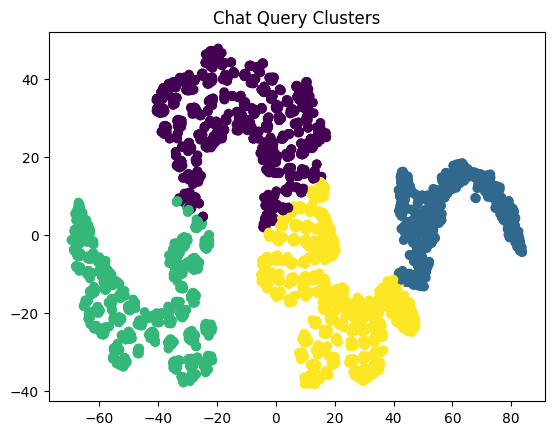

In [101]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=60,learning_rate=100) # You can adjust n_components and perplexity
vis_data = tsne.fit_transform(X_new)

plt.scatter(vis_data[:, 0], vis_data[:, 1], c=df['Kmeans'], cmap='viridis')
plt.title("Chat Query Clusters")
plt.show()

In [102]:
# Inspect cluster examples
for i in range(4):
    print(f"\nCluster {i} examples:")
    print(df[df['Kmeans'] == i]['t'].sample(5).to_list())


Cluster 0 examples:
['How do I call up the loan app process?', 'Was the last payment processed correctly?', 'i need ta check how much mony i have thx', 'last purchse—was it even worth it', 'how can i request a new credit card?']

Cluster 1 examples:
['Would you confirm my eligibility for a turnkey project loan?', 'Can you please confirm the current phase of my loan application review?', 'CHARGES TO "PREMIUM PETS"? MY HAMSTER’S A SKELETON—WHO’S SPENDING??', 'I am interested in understanding if I meet your criteria for a loan approval.', 'I request a detailed explanation of the process for applying for a loan from your bank.']

Cluster 2 examples:
['new cust loan apply? how?', 'cant login, pass sucks now', 'How do I go abt gettin a loan?', 'transac went poof—why?', 'no idea what store this is']

Cluster 3 examples:
['Was the previous transaction successful without issues?', 'Can you tell me the time of my last transaction?', 'Did the most recent transaction proceed correctly?', 'What’s 

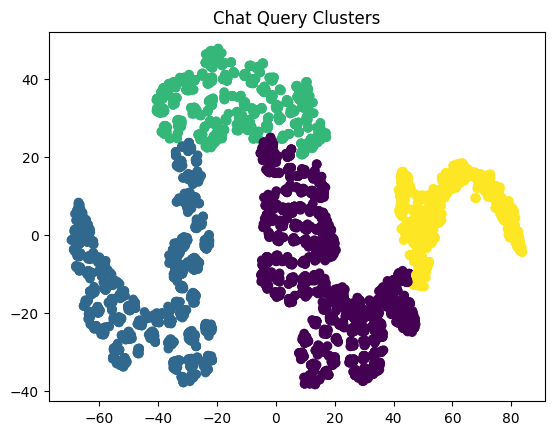

In [103]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#tsne = TSNE(n_components=2, random_state=42, perplexity=60,learning_rate=100) # You can adjust n_components and perplexity
#vis_data = tsne.fit_transform(X_new)

plt.scatter(vis_data[:, 0], vis_data[:, 1], c=df['Agg_cluster'], cmap='viridis')
plt.title("Chat Query Clusters")
plt.show()

In [104]:
# Inspect cluster examples
for i in range(4):
    print(f"\nCluster {i} examples:")
    print(df[df['Agg_cluster'] == i]['t'].sample(5).to_list())


Cluster 0 examples:
['This is unacceptable—ANSWER MY SAVINGS INQUIRY!', 'What are the requirements to apply for an unsecured loan?', 'What’s the date and time for my last trans?', 'I’d like details on your green energy loan products.', 'hey, any deets on what’s happenin with ma loan app?']

Cluster 1 examples:
['do i meet payday alt criteria?', 'do i check ur loan boxes?', 'do i ring as loan material?', 'still no reset email, resend', 'password tool broke, pls help']

Cluster 2 examples:
['recent transction? cries silently', 'someone’s takin loans in my name—HELP!!', 'Loan application—how do I get started?', 'how much do i have in there? forgot tbh', 'Scam alert, my funds got robbed!']

Cluster 3 examples:
['$450 AT "FITNESS FREAK"? I HATE GYMS—REVERSE THIS OR I’M CLOSING MY ACCOUNT!', 'WHO’S "LUXURY LIVING"? I LIVE IN A STUDIO—STOP THIS FRAUD NOW!!', 'Would you kindly explain the proper process for applying for a loan?', 'May I know whether I fulfill the eligibility criteria for a lo

In [105]:
# umap dimensionality reduction
import umap
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Step 1: Apply UMAP
umap_model = umap.UMAP(
    n_components=2,       # project to 2D
    n_neighbors=15,       # size of local neighborhood (controls balance of local/global structure)
    min_dist=0.1,         # how tightly UMAP packs points together
    random_state=42
)
X_umap = umap_model.fit_transform(X_new)

print("Shape after UMAP:", X_umap.shape)

# Step 2: Cluster with KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_umap)

# Step 3: Add cluster labels to dataframe
df["UMAP_KMeans"] = clusters

# Step 4: Evaluate clustering
silhouette = silhouette_score(X_umap, clusters)
calinski = calinski_harabasz_score(X_umap, clusters)
davies = davies_bouldin_score(X_umap, clusters)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.3f}")
print(f"Davies-Bouldin Score: {davies:.3f}")


Shape after UMAP: (5000, 2)
Silhouette Score: 0.488
Calinski-Harabasz Score: 6494.805
Davies-Bouldin Score: 0.666


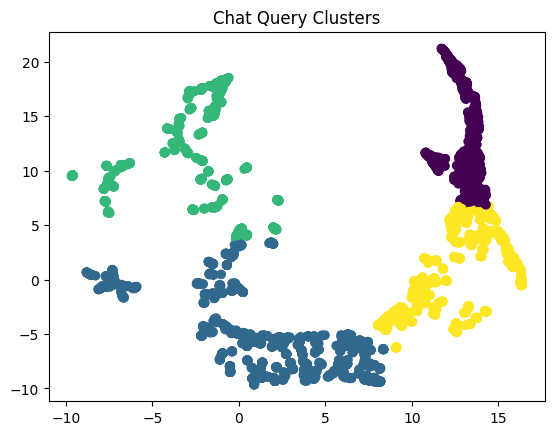

In [106]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['UMAP_KMeans'], cmap='viridis')
plt.title("Chat Query Clusters")
plt.show()

In [107]:
# Inspect cluster examples
for i in range(4):
    print(f"\nCluster {i} examples:")
    print(df[df['UMAP_KMeans'] == i]['t'].sample(5).to_list())


Cluster 0 examples:
['What are the steps to apply for a startup seed funding loan?', 'How do I request a credit card application package by mail?', 'Please explain the formal process required for applying for a loan.', 'Are you able to share the current status of my loan application?', 'Would you confirm whether I meet the criteria for a third-party guarantor loan?']

Cluster 1 examples:
['last transction—am i in debt now', 'Did that last payment go through or not?', 'do i got shiine 4 loan approval?', 'check my funds? i’m clueless rn', 'they told me to clear browser cookies manually']

Cluster 2 examples:
['card said no. why?', 'did i pass prequal or nah?', 'this not how i roll', 'atm hacked or smth', 'gotta block dis ASAP']

Cluster 3 examples:
['Please advise on how I may reset my password.', 'What was the time and date on my last purchase?', 'That check deposit wasn’t authorized—please review.', 'What’s the payee listed for my most recent transaction?', 'Someone may have stolen my

In [108]:
n_clusters = 4  # you can change this
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clust.fit_predict(X_umap)

df['Agg_UMAP'] = cluster_labels

# ==== 5. Evaluation ====
sil_score = silhouette_score(X_umap, cluster_labels)
calinski_score = calinski_harabasz_score(X_umap, cluster_labels)
davies_score = davies_bouldin_score(X_umap, cluster_labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Score: {calinski_score:.3f}")
print(f"Davies-Bouldin Score: {davies_score:.3f}")

Silhouette Score: 0.486
Calinski-Harabasz Score: 6311.422
Davies-Bouldin Score: 0.673


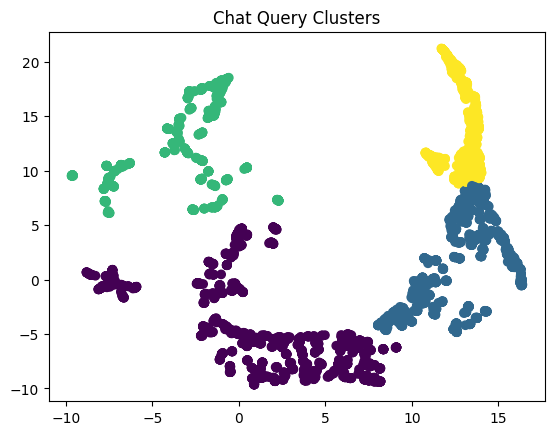

In [109]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['Agg_UMAP'], cmap='viridis')
plt.title("Chat Query Clusters")
plt.show()

In [110]:
# Inspect cluster examples
for i in range(4):
    print(f"\nCluster {i} examples:")
    print(df[df['Agg_UMAP'] == i]['t'].sample(5).to_list())


Cluster 0 examples:
['I got cheated! Plz refund my money.', 'why’s my card gatekeepin my $$$?', 'how’d my charge get declin? clueless', 'Someone better call me back!', 'I found a hold on an unauthorized check.']

Cluster 1 examples:
['I see a payee name scratched out on the check image.', 'checks with my name—but that ain’t my handwriting!!', 'Are you incompetent? SAVINGS TOTAL THIS INSTANT!', 'How can I apply for a healthcare professional loan?', "I can't access my account; please reset my password."]

Cluster 2 examples:
['reverse those charges NOW!!', 'how do i apply via chat?', 'last purchase? i forgot lol', 'how do i request financing?', 'wut info left on my cc form?']

Cluster 3 examples:
['CHARGES TO "CRYPTO QUEEN"? I DON’T TRUST BITCOIN—WHO’S ROBBING ME??', 'Could you assist me in determining if I qualify for your loan products?', 'Could you verify whether I qualify for an adjustable-rate mortgage product?', 'Can you confirm whether my loan application is still under active re

In [119]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Run multiple clustering methods
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20).fit_predict(X_new)
agg = AgglomerativeClustering(n_clusters=4).fit_predict(X_new)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_new)

labels_list = [kmeans, agg, dbscan]
n_samples = X_new.shape[0]

# Build co-association matrix
coassoc = np.zeros((n_samples, n_samples))
for labels in labels_list:
    for i in range(n_samples):
        for j in range(n_samples):
            if labels[i] == labels[j]:
                coassoc[i, j] += 1

# Normalize (fraction of methods that agree)
coassoc /= len(labels_list)

# Cluster the co-association matrix (using Agglomerative)
consensus = AgglomerativeClustering(n_clusters=4, linkage='average')
consensus_labels = consensus.fit_predict(1 - coassoc)  # dissimilarity = 1 - similarity

# Evaluate
silhouette = silhouette_score(X_new, consensus_labels)
calinski = calinski_harabasz_score(X_new, consensus_labels)
davies = davies_bouldin_score(X_new, consensus_labels)

print(f"Consensus Silhouette: {silhouette:.3f}")
print(f"Consensus Calinski-Harabasz: {calinski:.3f}")
print(f"Consensus Davies-Bouldin: {davies:.3f}")


Consensus Silhouette: 0.221
Consensus Calinski-Harabasz: 8039.715
Consensus Davies-Bouldin: 0.892


In [121]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Run multiple clustering methods
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20).fit_predict(X_tsne)
agg = AgglomerativeClustering(n_clusters=4).fit_predict(X_tsne)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_tsne)

labels_list = [kmeans, agg, dbscan]
n_samples = X_tsne.shape[0]

# Build co-association matrix
coassoc = np.zeros((n_samples, n_samples))
for labels in labels_list:
    for i in range(n_samples):
        for j in range(n_samples):
            if labels[i] == labels[j]:
                coassoc[i, j] += 1

# Normalize (fraction of methods that agree)
coassoc /= len(labels_list)

# Cluster the co-association matrix (using Agglomerative)
consensus = AgglomerativeClustering(n_clusters=4, linkage='average')
consensus_labels = consensus.fit_predict(1 - coassoc)  # dissimilarity = 1 - similarity

# Evaluate
silhouette = silhouette_score(X_tsne, consensus_labels)
calinski = calinski_harabasz_score(X_tsne, consensus_labels)
davies = davies_bouldin_score(X_tsne, consensus_labels)

print(f"Consensus Silhouette: {silhouette:.3f}")
print(f"Consensus Calinski-Harabasz: {calinski:.3f}")
print(f"Consensus Davies-Bouldin: {davies:.3f}")


Consensus Silhouette: 0.471
Consensus Calinski-Harabasz: 6982.333
Consensus Davies-Bouldin: 0.706


In [120]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Run multiple clustering methods
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20).fit_predict(X_umap)
agg = AgglomerativeClustering(n_clusters=4).fit_predict(X_umap)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_umap)

labels_list = [kmeans, agg, dbscan]
n_samples = X_umap.shape[0]

# Build co-association matrix
coassoc = np.zeros((n_samples, n_samples))
for labels in labels_list:
    for i in range(n_samples):
        for j in range(n_samples):
            if labels[i] == labels[j]:
                coassoc[i, j] += 1

# Normalize (fraction of methods that agree)
coassoc /= len(labels_list)

# Cluster the co-association matrix (using Agglomerative)
consensus = AgglomerativeClustering(n_clusters=4, linkage='average')
consensus_labels = consensus.fit_predict(1 - coassoc)  # dissimilarity = 1 - similarity

# Evaluate
silhouette = silhouette_score(X_umap, consensus_labels)
calinski = calinski_harabasz_score(X_umap, consensus_labels)
davies = davies_bouldin_score(X_umap, consensus_labels)

print(f"Consensus Silhouette: {silhouette:.3f}")
print(f"Consensus Calinski-Harabasz: {calinski:.3f}")
print(f"Consensus Davies-Bouldin: {davies:.3f}")


Consensus Silhouette: 0.486
Consensus Calinski-Harabasz: 6403.580
Consensus Davies-Bouldin: 0.676
